In [253]:
import pandas as pd
import re

In [254]:
df1 = pd.read_csv('result-1.csv')
df2 = pd.read_csv('result-2.csv')
df3 = pd.read_csv('result-3.csv')

df = pd.concat([df1,df2,df3])
df

,name,price,shop,location
0,"Iphone 11 128GB Garansi Resmi TAM / Ibox - white, 64 New Packed",Rp 7.950.000,-,-
1,"IPhone 12 Garansi Resmi Ibox - Hijau, 64 gb",Rp 11.599.000,-,-
2,Iphone 12 mini 128GB - Red,Rp10.499.000,Wellio Smartphone Official Shop,Kab. Bekasi
3,Iphone 12 mini 128GB - White,Rp10.499.000,Wellio Smartphone Official Shop,Kab. Bekasi
4,(OFFICIAL) Iphone 12 Pro 512GB - Gold,Rp19.299.000,Wellio Smartphone Official Shop,Kab. Bekasi
...,...,...,...,...
28,Iphone 13 Pro Max 256gb - Garansi Resmi,Rp19.991.000,Maju Hardware,Madiun
29,Iphone 13 mini 256GB - Pink,Rp15.999.000,Wellio Smartphone Official Shop,Kab. Bekasi
30,(OFFICIAL) Iphone 12 Pro 512GB - Graphite,Rp19.299.000,Wellio Smartphone Official Shop,Kab. Bekasi
31,Iphone 13 512GB - Midnight,Rp20.099.000,Wellio Smartphone Official Shop,Kab. Bekasi


In [255]:
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 10

In [256]:
df['index'] = [x for x in range(len(df.name))]
df.set_index('index', inplace=True)
df

,name,price,shop,location
index,,,,
0,"Iphone 11 128GB Garansi Resmi TAM / Ibox - white, 64 New Packed",Rp 7.950.000,-,-
1,"IPhone 12 Garansi Resmi Ibox - Hijau, 64 gb",Rp 11.599.000,-,-
2,Iphone 12 mini 128GB - Red,Rp10.499.000,Wellio Smartphone Official Shop,Kab. Bekasi
3,Iphone 12 mini 128GB - White,Rp10.499.000,Wellio Smartphone Official Shop,Kab. Bekasi
4,(OFFICIAL) Iphone 12 Pro 512GB - Gold,Rp19.299.000,Wellio Smartphone Official Shop,Kab. Bekasi
...,...,...,...,...
170,Iphone 13 Pro Max 256gb - Garansi Resmi,Rp19.991.000,Maju Hardware,Madiun
171,Iphone 13 mini 256GB - Pink,Rp15.999.000,Wellio Smartphone Official Shop,Kab. Bekasi
172,(OFFICIAL) Iphone 12 Pro 512GB - Graphite,Rp19.299.000,Wellio Smartphone Official Shop,Kab. Bekasi


In [257]:
# Iphone 13 pro max has 3 variance: 128gb, 256gb, 512gb
# i choose 128gb
df = df.loc[df.name.str.contains(r"iphone 13 pro max", case=False, regex=False), :]
df

,name,price,shop,location
index,,,,
7,Apple Iphone 13 Pro Max 256gb Garansi Resmi [Ibox],Rp23.299.000,tokolasvegas,Surabaya
9,Apple Iphone 13 Pro Max 128gb | 256gb | 512gb | 1tb Garansi Resmi Ibox,Rp19.699.000,Universe Store,Jakarta Utara
10,Iphone 13 Pro Max 128gb/256gb/512gb/1tb Garansi Resmi Ibox/Tam,Rp19.599.000,Senjaya Selindo,Jakarta Pusat
11,Apple Iphone 13 Pro Max 128gb Ibox Dual Sim Green | Iphone 13 Mini 128,Rp12.765.000,Studio Ponsel,Jakarta Pusat
12,Iphone 13 Pro Max 128gb Garansi Resmi Ibox / Tam,Rp19.689.000,PREMIUM OFFICIAL STORE,Bekasi
...,...,...,...,...
163,Apple Iphone 13 Pro Max 256gb 6.7 Inch Garansi Resmi,Rp23.299.000,Andalas Cellular Bpn,Balikpapan
164,Iphone 13 Pro Max 256gb Garansi Resmi,Rp23.299.000,SURYAPHONE SAMARINDA,Samarinda
165,Iphone 13 Pro Max 512gb,Rp27.299.000,SURYAPHONE SAMARINDA,Samarinda


In [258]:
for name in df.name:
    if re.findall("128", name):
        continue
    else:
        df.drop(df.loc[df.name == name].index, inplace=True)

pd.options.display.max_rows=200
df

,name,price,shop,location
index,,,,
9,Apple Iphone 13 Pro Max 128gb | 256gb | 512gb | 1tb Garansi Resmi Ibox,Rp19.699.000,Universe Store,Jakarta Utara
10,Iphone 13 Pro Max 128gb/256gb/512gb/1tb Garansi Resmi Ibox/Tam,Rp19.599.000,Senjaya Selindo,Jakarta Pusat
11,Apple Iphone 13 Pro Max 128gb Ibox Dual Sim Green | Iphone 13 Mini 128,Rp12.765.000,Studio Ponsel,Jakarta Pusat
12,Iphone 13 Pro Max 128gb Garansi Resmi Ibox / Tam,Rp19.689.000,PREMIUM OFFICIAL STORE,Bekasi
13,Iphone 13 Pro Max Ibox Dual Sim Green 1tb 512gb 256gb 128gb | 13 Mini,Rp12.765.000,Studio Ponsel,Jakarta Pusat
17,Iphone 13 Pro Max 128gb Garansi Resmi Tam/Ibox,Rp19.699.000,INTIKOM STORE,Medan
18,Apple Iphone 13 Pro Max 128/256/512 Gb 1 Tb Rom 128 256 512gb 1tb Ios,Rp19.797.000,SUPER_GADGET,Jakarta Pusat
21,Iphone 13 Pro Max 1tb 5g Ibox 128gb 256gb 512gb - Not 12 Mini 256 128,Rp14.728.000,Dewa Ponsel Rakyat,Jakarta Pusat
22,Apple Iphone 13 Pro Max 128gb Grs Resmi Ibox Indonesia,Rp19.349.000,CMP phone,Jakarta Pusat


In [259]:
df.sort_values(by=['price'], ascending=True, inplace=True)
pd.options.display.max_rows=10
df

,name,price,shop,location
index,,,,
11,Apple Iphone 13 Pro Max 128gb Ibox Dual Sim Green | Iphone 13 Mini 128,Rp12.765.000,Studio Ponsel,Jakarta Pusat
13,Iphone 13 Pro Max Ibox Dual Sim Green 1tb 512gb 256gb 128gb | 13 Mini,Rp12.765.000,Studio Ponsel,Jakarta Pusat
21,Iphone 13 Pro Max 1tb 5g Ibox 128gb 256gb 512gb - Not 12 Mini 256 128,Rp14.728.000,Dewa Ponsel Rakyat,Jakarta Pusat
119,Iphone 13 Pro Max 128gb Ibox / Single / Dual / Apple,Rp17.338.000,HokiHP,Jakarta Pusat
31,Iphone 13 Pro Max Dual Sim 1tb 512gb 256gb 128gb Apple Promax,Rp17.410.000,Studio Ponsel,Jakarta Pusat
...,...,...,...,...
37,Iphone 13 Pro Max 128gb / 256gb / 512gb / 1tb Garansi Resmi Tam / Ibox,Rp22.135.000,Kreasindo Online,Jakarta Pusat
91,Iphone 13 Pro Max 128gb 256gb 512gb 1tb Blue Graphite Gold - Ibox 1th,Rp22.259.000,Gadget Channel,Jakarta Pusat
155,Iphone 13 Pro Max 128gb | 256gb | 512gb Garansi Resmi Ibox,Rp22.259.000,Fenix Gadget,Surabaya


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 11 to 41
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      54 non-null     object
 1   price     54 non-null     object
 2   shop      54 non-null     object
 3   location  54 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


In [261]:
df.price.astype(int)
df.info()

ValueError: invalid literal for int() with base 10: 'Rp12.765.000'

In [262]:
price_list = []
for p in df.price:
    replace = re.sub(r"\.", "", p.lstrip("Rp"))
    price_list.append(replace)
df.price = price_list
df

,name,price,shop,location
index,,,,
11,Apple Iphone 13 Pro Max 128gb Ibox Dual Sim Green | Iphone 13 Mini 128,12765000,Studio Ponsel,Jakarta Pusat
13,Iphone 13 Pro Max Ibox Dual Sim Green 1tb 512gb 256gb 128gb | 13 Mini,12765000,Studio Ponsel,Jakarta Pusat
21,Iphone 13 Pro Max 1tb 5g Ibox 128gb 256gb 512gb - Not 12 Mini 256 128,14728000,Dewa Ponsel Rakyat,Jakarta Pusat
119,Iphone 13 Pro Max 128gb Ibox / Single / Dual / Apple,17338000,HokiHP,Jakarta Pusat
31,Iphone 13 Pro Max Dual Sim 1tb 512gb 256gb 128gb Apple Promax,17410000,Studio Ponsel,Jakarta Pusat
...,...,...,...,...
37,Iphone 13 Pro Max 128gb / 256gb / 512gb / 1tb Garansi Resmi Tam / Ibox,22135000,Kreasindo Online,Jakarta Pusat
91,Iphone 13 Pro Max 128gb 256gb 512gb 1tb Blue Graphite Gold - Ibox 1th,22259000,Gadget Channel,Jakarta Pusat
155,Iphone 13 Pro Max 128gb | 256gb | 512gb Garansi Resmi Ibox,22259000,Fenix Gadget,Surabaya


In [263]:
df.price = df.price.astype(int)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 11 to 41
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      54 non-null     object
 1   price     54 non-null     int32 
 2   shop      54 non-null     object
 3   location  54 non-null     object
dtypes: int32(1), object(3)
memory usage: 1.3+ KB


<AxesSubplot:>

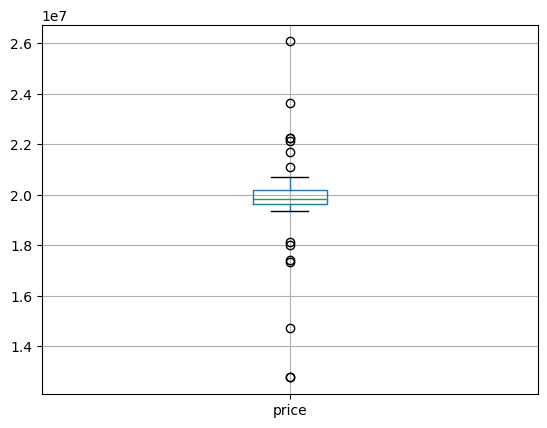

In [265]:
df.boxplot('price')